**O PERCEPTRON**
- "O neurônio artificial";
- Sua estrutura consiste uma quantidade de inputs, com um especial chamado "bias", (x0 - que é o *bias* -, x1, x2,..., xn), uma quantidade de pesos (w0, w1, w2, ..., wn) e uma **única saída**, comumente chamada de *y*;
- Cada input está associado a um peso.

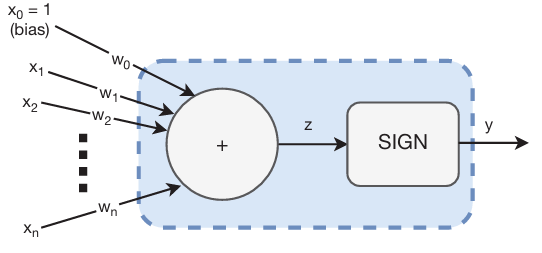
*A imagem representa a estrutra de um perceptron*

**A estrutura**
- O circulo branco com o mais no meio representa o somatório dos pesos multiplicados pelos inputs. Essa soma ponderada fica conhecida como *z*;
- Esse *z* vai para uma função de ativação chamada *signum*, que funciona da seguinte forma: z < 0 -> output = -1; z >= 0 -> output = 1.


# IMPLEMENTAÇÃO DA FUNÇÃO DO PERCEPTRON

- 'w' e 'x' são vetores de n elementos, W o vetor de pesos e X o de inputs.
- Para o caso dessa função, o primeiro elemento de X deverá ser 1, que nesse caso é o bias selecionado.

In [16]:
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += w[i] * x[i] #Soma ponderada dos inputs e pesos
    if z < 0:   #Aplicação da função de ativação
        return -1
    else:
        return 1

## EXEMPLO DO PERCEPTRON COM DOIS INPUTS
- Como comentado, o primeiro valor de X será 1 e os outros valores de input serão -1 e 1. Logo, X = [1, -1, 1]
- Os valores dos pesos serão: W = [0.8, -0.5, -0.4]

In [2]:
teste = compute_output([0.8, -0.5, -0.4], [1, -1, 1])
print(teste)

1


## OUTROS EXEMPLOS

In [7]:
t2 = compute_output([0.8, -0.5, -0.4], [1, 1, 1])
print('T2 =', t2)
t3 = compute_output([0.8, -0.5, -0.4], [1, -1, -1])
print('T3 =', t3)

T2 = -1
T3 = 1


# ALGORITMO DE APRENDIZAGEM DO PERCEPTRON
1. Inicialize aleatoriamente os pesos;
2. Selecionar um par de input/output correspondente;
3. Passar os valores de input para o perceptron calcular a saída *y*;
4. Se a saída *y* for diferente do output esperado, o correto, ajuste os pesos da seguinte maneira:
    - Se o *y*<0, some kxi para cada peso wi, com k sendo alguma constante;
    - Se o *y*>0, subtraia kxi para cada peso wi, com k sendo alguma constante;
5. Repita os passos 2, 3 e 4 até que o perceptron acertar todos os exemplos.

Obs: No entanto, o perceptron possui limitações e haverá casos em que o algoritmo não conseguirá convergir.

------------------------------------------------------------------------------------------------------------------
A constante que chamei de *k* anteriormente é conhecida como *learning rate*. Ela é um hiperparâmetro, ou seja, algo externo ao modelo que podemos ajustar antes do início do treinamento, não é um parâmetro ajustado diretamente pelo algoritmo de aprendizagem.

##  UTILIZANDO ESSE ALGORITMO NO PERCEPTRON

### Inicializando o código para o exemplo do perceptron

In [17]:
import random

def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])
    
random.seed(7) #Para garantir a reprodutibilidade dos resultados
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] #Posteriormente, esses índices serão embaralhados para deixar o treinamento mais aleatório

#Exemplos das entradas do perceptron
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
#Exemplos das saídas do perceptron
y_train = [1.0, 1.0, 1.0, -1.0]

#Definição dos pesos iniciais
w = [0.2, -0.6, 0.25]

show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


### Loop para treinamento do perceptron

In [18]:
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) #Embaralha os índices para o treinamento aleatório
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) #Calcula a saída do perceptron

        if y != p_out:  #Ajusta os pesos se a saída estiver errada
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w)

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


Até o momento, estou limitando os valores de input a serem 1 ou -1. Porém, posso colocar qualquer combinação de dois números reais no perceptron que ele dará a resposta como 1 ou -1. Com isso, consigo representar graficamente a saída do perceptron para duas variáveis, x1 e x2, sendo x1 o primeiro input e o x2 o segundo. O mais e o menos no gráfico corresponde a saída do perceptron para a combinação das duas variáveis.

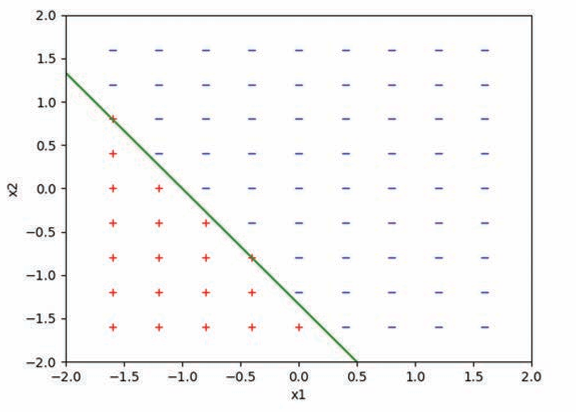

w0 =  0.20 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


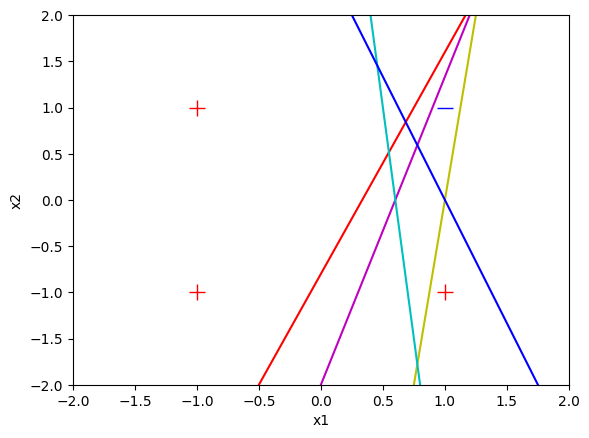

In [19]:
import matplotlib.pyplot as plt
import random

#Definição das cores para o gráfico
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
            ', w2 =', '%5.2f' % w[2])    
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
                    'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)), 
            -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]), 
            -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
        color_index += 1

random.seed(7) #Para garantir a reprodutibilidade dos resultados
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] #Posteriormente, esses índices serão embaralhados para deixar o treinamento mais aleatório

x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), 
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] #Inputs
y_train = [1.0, 1.0, 1.0, -1.0] #Outputs 
#Definição dos pesos iniciais
w = [0.2, -0.6, 0.25]
show_learning(w)

all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) #Embaralha os índices para o treinamento aleatório
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) #Calcula a saída do perceptron

        if y != p_out:  #Ajusta os pesos se a saída estiver errada
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w)

Nesse caso acima, a primeira linha, ou seja, a relacionada aos primeiros pesos (inicializados aleatoriamente) é a vermelha. A cada atualização dos pesos uma nova linha é colocada com uma cor diferente. A reta final, que corresponde aos pesos ajustados corretamente é a reta azul, que separa o único *menos* dos três *mais*.

*OBS: A sequência do aprendizado seria: vermelho, magenta, amarelo, ciano e azul*

## LIMITAÇÕES DO PERCEPTRON